In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [ ]:
#Loading data

In [3]:
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [ ]:
# Data preprocessing 

In [5]:
df.shape

(30, 17)

In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [9]:
df.dtypes # No categorical values in data

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [11]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [ ]:
#missing values

In [12]:
df.isnull().sum()  # no missing values found in data

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [ ]:
#corelation analysis

In [13]:
corr = df.corr()
corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [14]:
df.corr()['W'] # SV,SHO,SO,HR,2B are corelated with W (win)

W      1.000000
R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
Name: W, dtype: float64

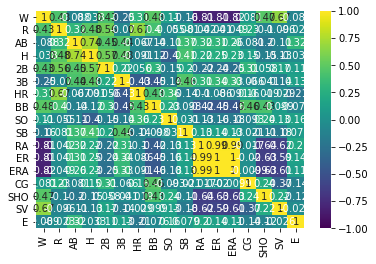

In [15]:
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap='viridis')

In [ ]:
# data Distribution

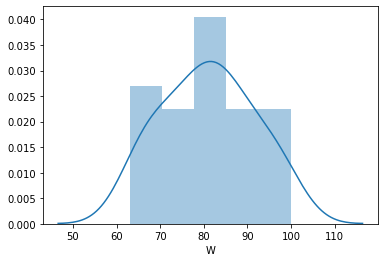

In [16]:
sns.distplot(df['W'])

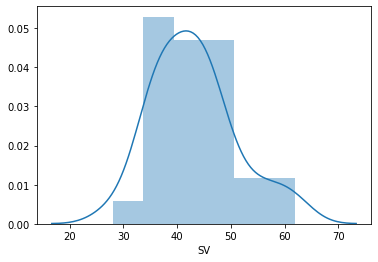

In [17]:
sns.distplot(df['SV'])

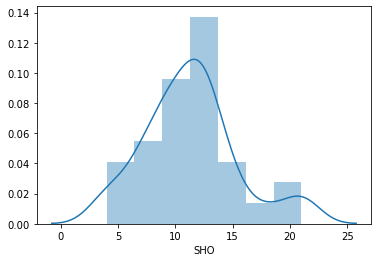

In [18]:
sns.distplot(df['SHO'])

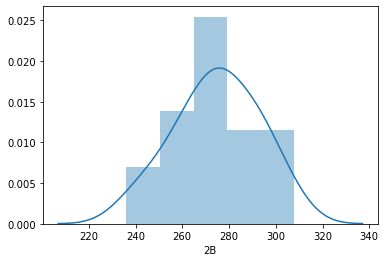

In [19]:
sns.distplot(df['2B'])

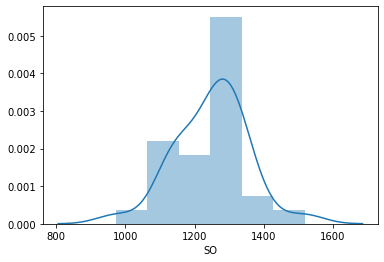

In [20]:
sns.distplot(df['SO'])

In [21]:
## Outliers Identification 

In [22]:
def outlier_iqr(input_data):
    q1=input_data.quantile(0.25)
    q3=input_data.quantile(0.75)
    iqr = q3-q1
    lower_whisker = q1-(1.5*iqr)
    upper_whisker = q3+(1.5*iqr)
    outlier_list = []
    for i in input_data:
        if i>upper_whisker or i<lower_whisker:
            outlier_list.append(i)
    print ('outliers are', outlier_list)
    print ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)
    return ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)

In [23]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [24]:
#Quantifying Outliers
cols=['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
for i in cols:
    print('*****',i)
    outlier_iqr(df[i])
    print('*****')

***** W
outliers are []
lower_whisker value : 53.375 upper_whisker value 108.375
*****
***** R
outliers are [891]
lower_whisker value : 550.75 upper_whisker value 818.75
*****
***** AB
outliers are []
lower_whisker value : 5305.0 upper_whisker value 5729.0
*****
***** H
outliers are []
lower_whisker value : 1230.25 upper_whisker value 1584.25
*****
***** 2B
outliers are []
lower_whisker value : 222.5 upper_whisker value 328.5
*****
***** 3B
outliers are []
lower_whisker value : -1.0 upper_whisker value 63.0
*****
***** HR
outliers are []
lower_whisker value : 85.125 upper_whisker value 232.125
*****
***** BB
outliers are []
lower_whisker value : 318.75 upper_whisker value 610.75
*****
***** SO
outliers are []
lower_whisker value : 926.5 upper_whisker value 1542.5
*****
***** SB
outliers are []
lower_whisker value : 27.75 upper_whisker value 137.75
*****
***** RA
outliers are []
lower_whisker value : 491.875 upper_whisker value 876.875
*****
***** ER
outliers are []
lower_whisker value 

In [ ]:
# Train test split

In [25]:
X=df.copy()
X.drop(['W'], axis=1, inplace =True)

In [26]:
Y = df['W']
Y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=200)

In [ ]:
## Data standardization

In [28]:
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler(with_mean=True, with_std=True)
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)
x_train = pd.DataFrame(x_train, columns=X.columns)
x_test = pd.DataFrame(x_test, columns=X.columns)
x_train.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,-0.615395,0.358426,-0.341826,-0.744326,-0.728751,0.932288,-0.109319,0.783416,-0.489306,0.716550,0.812598,0.679620,1.025351,-0.031723,0.152789,-0.006384
1,-0.884237,0.729449,-0.289125,-1.047102,-0.242917,-0.052971,0.274630,-0.084863,2.256441,1.144189,1.178466,1.101026,-0.643017,-1.046872,-1.156830,-0.312801
2,0.174327,-1.235597,-0.622900,-0.562660,-1.603252,0.264854,1.191839,0.869172,-0.996213,-0.673277,-0.778132,-0.658963,0.191167,0.222064,-0.371059,-0.312801
3,-0.817027,-0.452327,-0.271558,0.224559,0.242917,-0.052971,-1.005198,0.504709,0.271055,-0.566367,-0.348635,-0.361500,-1.060108,-0.031723,2.117218,0.070221
4,3.333217,-0.122529,1.432449,2.041218,-1.214585,2.012894,1.853083,-1.199689,0.313297,-0.138728,-0.269099,-0.212769,1.442442,-0.539298,-1.287792,-0.466009


In [ ]:
# ML models

In [29]:
from sklearn.linear_model import LinearRegression
mlr_model=LinearRegression(fit_intercept=True)
mlr_model.fit(x_train, y_train)
mlr_pred = mlr_model.predict(x_test)
print ('Model predicted for given test set')
print ('Model predicted values', mlr_pred)

Model predicted for given test set
Model predicted values [ 68.9224425   76.45950172  89.98495125  77.29915289 103.43336268
  79.65058895]


In [30]:
r2_value=mlr_model.score(x_test, y_test)
r2_value

0.372364995532553

In [31]:
from sklearn.tree import DecisionTreeRegressor
DT_model=DecisionTreeRegressor(criterion='mse', splitter='best', random_state=None)
DT_model.fit(x_train, y_train)
DT_pred = DT_model.predict(x_test)
print (DT_pred)

[76. 78. 92. 80. 90. 83.]


In [32]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [33]:
rf_model=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeRegressor(criterion='mse'))
rf_model.fit(x_train,y_train) # fitting our bagging tree ensemble using fit method
print (rf_model.oob_score_*100)

37.192450302820625
